In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
g = 9.81 #m/s^2
Cd = 1.0/40.0
Cl = 1.0 
vt = 30.0 #m/s
vt2 = 30**2

# Initial values
v0 = vt
theta0 = 0.0 #rad
x0 = 0.0 #m
y0 = 1000.0 #m

#Final time
T = 100
dt = 0.1

N = int(T/dt + 1)


In [6]:
u = np.zeros((N,4))
u[0,0] = v0
u[0,1] = theta0
u[0,2] = x0
u[0,3] = y0

In [7]:
# Iteration through Euler method
def runge_kutta(u, dt, N):
    '''Function uses Runge-Kutta method to solve differential equation
    
    Parameters
    ----------
    u : numpy.ndarray
        Array with initial values
        2D, rows are determined by N, columns
        by initial values.
    dt: Time step associated with N
    N : number of steps in the time interval
    
    Returns
    -------
    u : numpy.ndarray
        The solution at all time steps.
    '''
    for i in range(N-1):
        v_n = u[i][0]
        theta_n = u[i][1]
        x_n = u[i][2]
        y_n = u[i][3]

        f_n = np.array([
            -g*np.sin(theta_n) - (Cd/Cl)*(g/vt2)*v_n**2,
            -(g/v_n)*np.cos(theta_n) + (g/vt2)*v_n,
            v_n*np.cos(theta_n),
            v_n*np.sin(theta_n)
        ])
        # Update values to temporary array
        u_temp = u[i] + 0.5*dt*f_n
        
        
        v_n = u_temp[i][0]
        theta_n = u_temp[i][1]
        x_n = u_temp[i][2]
        y_n = u_temp[i][3]

        f_n = np.array([
            -g*np.sin(theta_n) - (Cd/Cl)*(g/vt2)*v_n**2,
            -(g/v_n)*np.cos(theta_n) + (g/vt2)*v_n,
            v_n*np.cos(theta_n),
            v_n*np.sin(theta_n)
        ])
        u = u[i] + dt*f_n
    return u

In [8]:
a = runge_kutta(u, dt, N)

IndexError: invalid index to scalar variable.

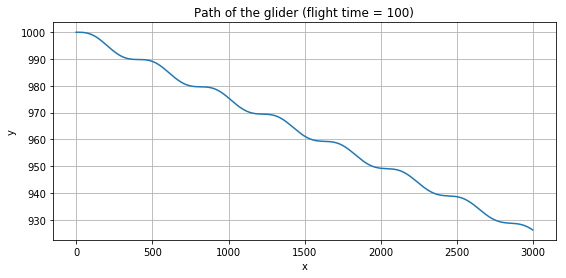

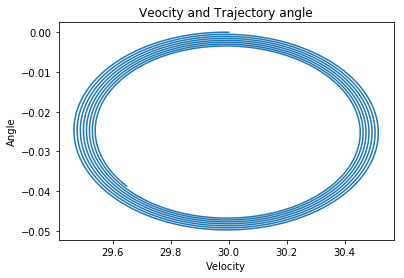

In [151]:
plt.figure(figsize=(9.0, 4.0))
plt.title('Path of the glider (flight time = {0})'.format(T))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(a[:,2], a[:,3])
plt.figure()
plt.title('Veocity and Trajectory angle')
plt.xlabel('Velocity')
plt.ylabel('Angle')
plt.plot(a[:,0], a[:,1])

In [140]:
# Calculating the order of convergence
# ratio
r = 2

# time steps
dt_coarsest = 0.004
dt_medium = 0.002
dt_finest = 0.001

# N for different time step sizes
N_coarsest = int(T/dt_coarsest + 1)
N_medium = int(T/dt_medium + 1)
N_finest = int(T/dt_finest + 1)

# initial u arrays holding variables at all time points
u_coarsest = np.zeros((N_coarsest, 4))
u_coarsest[0,0] = v0
u_coarsest[0,1] = theta0
u_coarsest[0,2] = x0
u_coarsest[0,3] = y0
u_coarsest = euler(u_coarsest, dt_coarsest, N_coarsest)

u_medium = np.zeros((N_medium, 4))
u_medium[0,0] = v0
u_medium[0,1] = theta0
u_medium[0,2] = x0
u_medium[0,3] = y0
u_medium = euler(u_medium, dt_medium, N_medium)

u_finest = np.zeros((N_finest, 4))
u_finest[0,0] = v0
u_finest[0,1] = theta0
u_finest[0,2] = x0
u_finest[0,3] = y0
u_finest = euler(u_finest, dt_finest, N_finest)

In [141]:
f32 = np.zeros(4)
for i in range(len(f32)):
    for j in range(N_coarsest):
        f32[i] = f32[i] + np.abs(u_coarsest[j,i] 
                                 - u_medium[2*j, i])
f32 = f32 * dt_coarsest
f21 = np.zeros(4)
for i in range(len(f21)):
    for j in range(N_medium):
        f21[i] = f21[i] + np.abs(u_medium[j,i] - u_finest[2*j,i])
f21 = f21 * dt_medium
p = np.log10(f32/f21)/np.log10(r)
p = np.round(p,4)
print('Order of convergence')
print('velocity: {0} \ntheta: {1} \nX: {2} \nY: {3} \n'
     .format(p[0],p[1],p[2],p[3]))

Order of convergence
velocity: 1.0139 
theta: 1.0137 
X: 1.0138 
Y: 1.0139 

